In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv('dataset.csv')
print("Dataset loaded successfully!")

Dataset loaded successfully!


Dataset Dimensions

In [ ]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 7584 rows and 10 columns.


Glimpse of the Data

In [ ]:
print("First 5 rows of the dataset:")
display(df.head())

print("\nLast 5 rows of the dataset:")
display(df.tail())

First 5 rows of the dataset:


,rownames,Anger,Gender,item,resp,id,btype,situ,mode,r2
0,1,20,M,S1WantCurse,no,1,curse,other,want,N
1,2,11,M,S1WantCurse,no,2,curse,other,want,N
2,3,17,F,S1WantCurse,perhaps,3,curse,other,want,Y
3,4,21,F,S1WantCurse,perhaps,4,curse,other,want,Y
4,5,17,F,S1WantCurse,perhaps,5,curse,other,want,Y



Last 5 rows of the dataset:


,rownames,Anger,Gender,item,resp,id,btype,situ,mode,r2
7579,7580,17,M,S4DoShout,no,312,shout,self,do,N
7580,7581,20,F,S4DoShout,no,313,shout,self,do,N
7581,7582,25,F,S4DoShout,no,314,shout,self,do,N
7582,7583,23,F,S4DoShout,no,315,shout,self,do,N
7583,7584,12,F,S4DoShout,no,316,shout,self,do,N


Data Types and Non-Null Values

In [ ]:
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rownames  7584 non-null   int64 
 1   Anger     7584 non-null   int64 
 2   Gender    7584 non-null   object
 3   item      7584 non-null   object
 4   resp      7584 non-null   object
 5   id        7584 non-null   int64 
 6   btype     7584 non-null   object
 7   situ      7584 non-null   object
 8   mode      7584 non-null   object
 9   r2        7584 non-null   object
dtypes: int64(3), object(7)
memory usage: 592.6+ KB


Numerical Columns

In [ ]:
print("Summary statistics for numerical columns:")
display(df.describe())

Summary statistics for numerical columns:


,rownames,Anger,id
count,7584.000000,7584.000000,7584.0000
mean,3792.500000,20.003165,158.5000
std,2189.456554,4.841139,91.2269
min,1.000000,11.000000,1.0000
25%,1896.750000,17.000000,79.7500
50%,3792.500000,19.000000,158.5000
75%,5688.250000,23.000000,237.2500
max,7584.000000,39.000000,316.0000


Categorical (Object) Columns

In [ ]:
print("\nSummary statistics for categorical columns:")
display(df.describe(include=['object']))


Summary statistics for categorical columns:


,Gender,item,resp,btype,situ,mode,r2
count,7584,7584,7584,7584,7584,7584,7584
unique,2,24,3,3,2,2,2
top,F,S1WantCurse,no,curse,other,want,N
freq,5832,316,3973,2528,3792,3792,3973


Handling Missing Values

In [ ]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
rownames    0
Anger       0
Gender      0
item        0
resp        0
id          0
btype       0
situ        0
mode        0
r2          0
dtype: int64


Handling Duplicate Data

In [ ]:
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


Data Cleaning and Preparation

In [ ]:
# Drop the 'rownames' column as it's just an index
df.drop('rownames', axis=1, inplace=True)
print("Dropped 'rownames' column.")

Dropped 'rownames' column.


In [ ]:
# Convert object columns to category dtype for efficiency and semantic meaning
# Also convert 'id' to an object/category since it's an identifier, not a numeric feature
categorical_cols = ['Gender', 'item', 'resp', 'id', 'btype', 'situ', 'mode', 'r2']
for col in categorical_cols:
    df[col] = df[col].astype('category')

print("\nUpdated DataFrame Info:")
df.info()


Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Anger   7584 non-null   int64   
 1   Gender  7584 non-null   category
 2   item    7584 non-null   category
 3   resp    7584 non-null   category
 4   id      7584 non-null   category
 5   btype   7584 non-null   category
 6   situ    7584 non-null   category
 7   mode    7584 non-null   category
 8   r2      7584 non-null   category
dtypes: category(8), int64(1)
memory usage: 138.1 KB


Univariate Analysis of Numerical Variable: Anger

In [ ]:
sns.set(style="whitegrid", palette="viridis")

plt.figure(figsize=(18, 5))

<Figure size 1800x500 with 0 Axes>

<Figure size 1800x500 with 0 Axes>

Text(0, 0.5, 'Frequency')

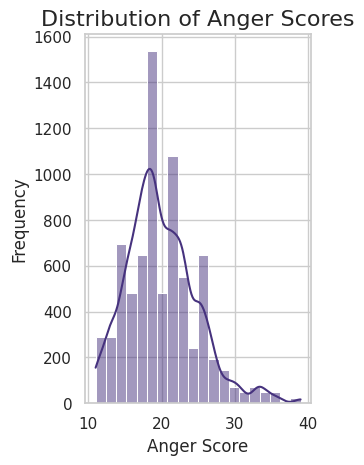

In [ ]:
# Histogram and Density Plot
plt.subplot(1, 2, 1)
sns.histplot(df['Anger'], kde=True, bins=20)
plt.title('Distribution of Anger Scores', fontsize=16)
plt.xlabel('Anger Score')
plt.ylabel('Frequency')

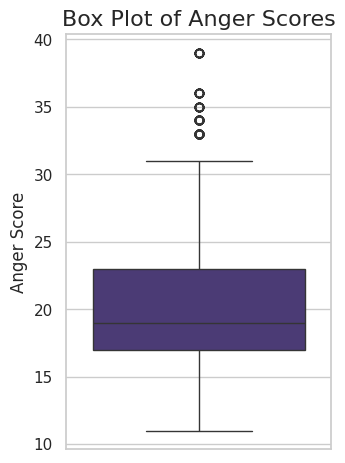

In [ ]:
# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Anger'])
plt.title('Box Plot of Anger Scores', fontsize=16)
plt.ylabel('Anger Score')

plt.tight_layout()
plt.show()

Univariate Analysis of Categorical Variables

In [ ]:
cat_vars_to_plot = ['Gender', 'resp', 'btype', 'situ', 'mode', 'r2']

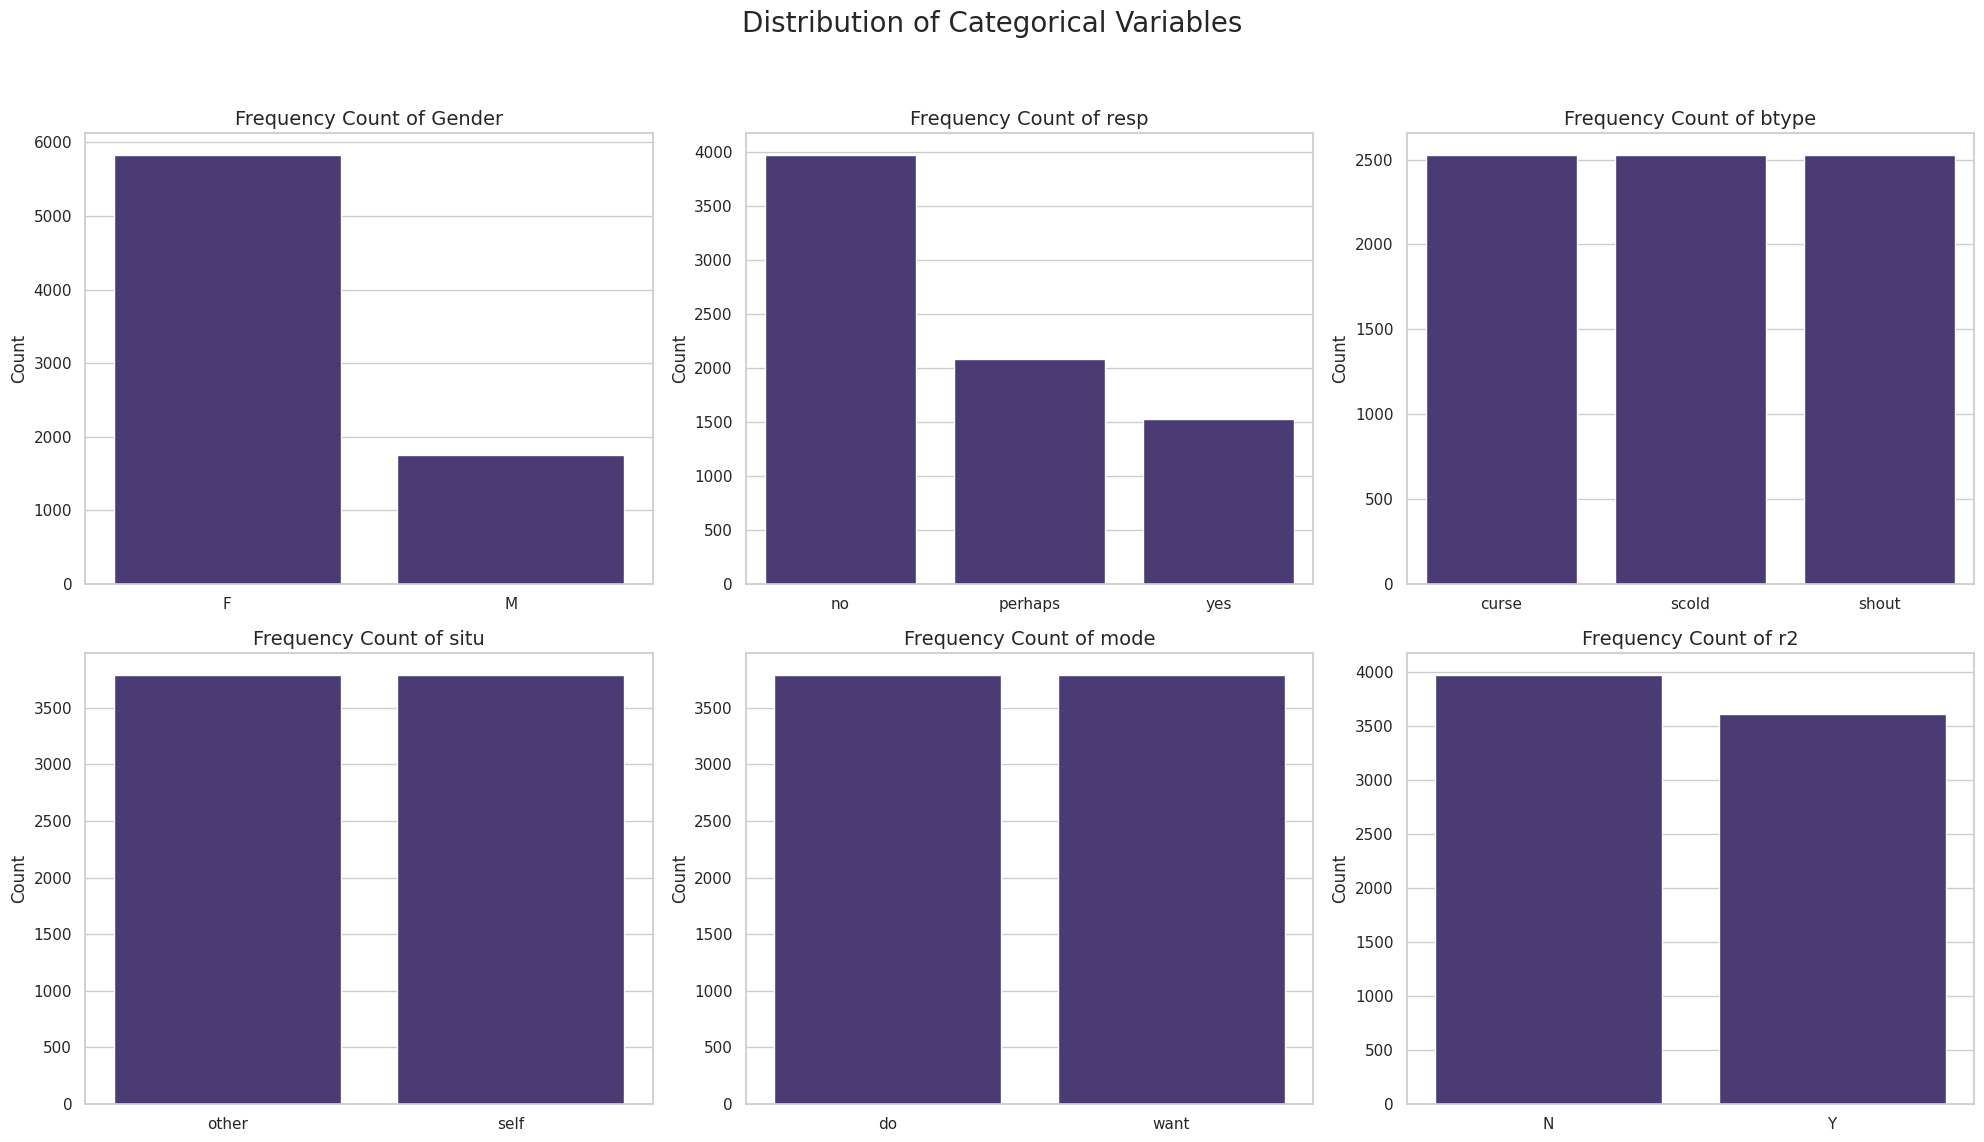

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten() # Flatten the 2x3 grid into a 1D array of axes
fig.suptitle('Distribution of Categorical Variables', fontsize=20)

for i, col in enumerate(cat_vars_to_plot):
    sns.countplot(x=col, data=df, ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(f'Frequency Count of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Bivariate Analysis: Numerical vs Categorical

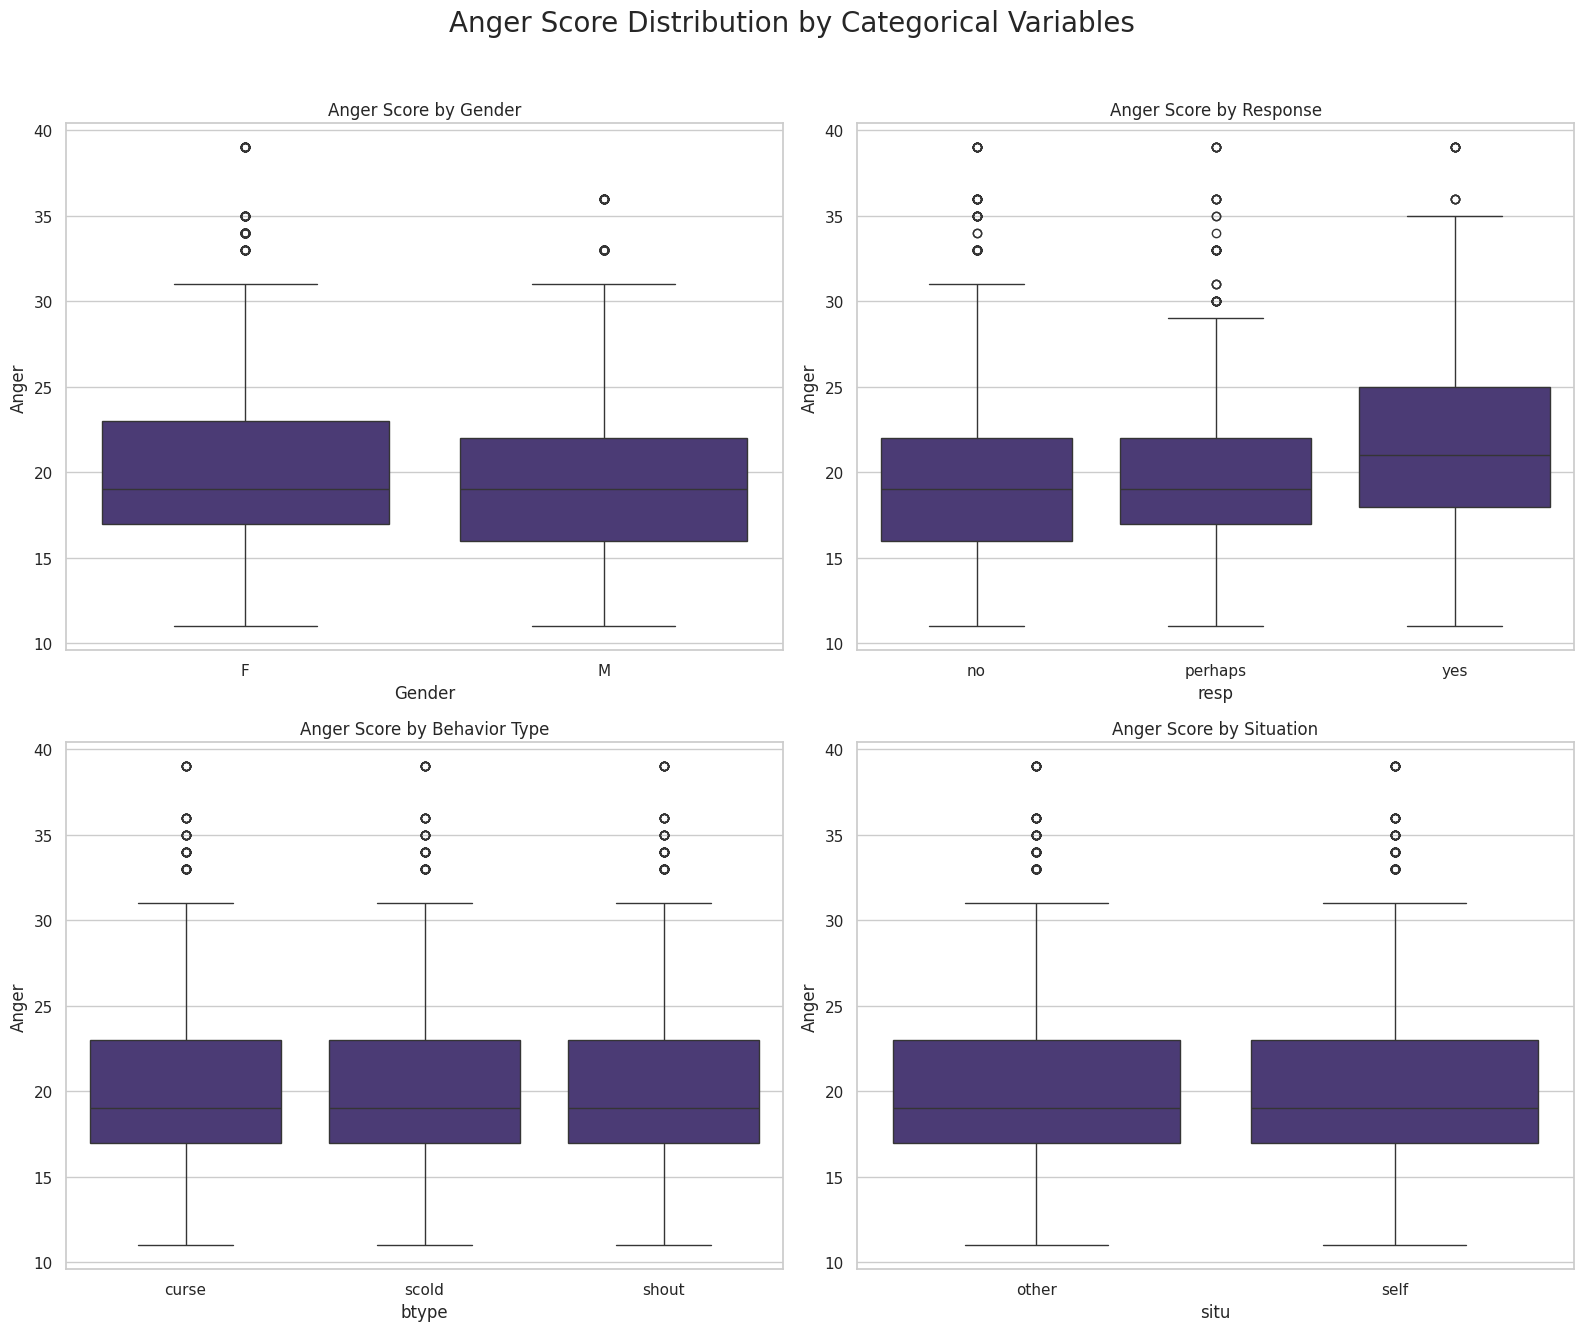

In [ ]:
# Anger vs. Gender, resp, btype, and situ
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.flatten()
fig.suptitle('Anger Score Distribution by Categorical Variables', fontsize=20)

# Anger vs. Gender
sns.boxplot(x='Gender', y='Anger', data=df, ax=axes[0])
axes[0].set_title('Anger Score by Gender')

# Anger vs. Response
sns.boxplot(x='resp', y='Anger', data=df, ax=axes[1], order=['no', 'perhaps', 'yes'])
axes[1].set_title('Anger Score by Response')

# Anger vs. Behavior Type
sns.boxplot(x='btype', y='Anger', data=df, ax=axes[2])
axes[2].set_title('Anger Score by Behavior Type')

# Anger vs. Situation
sns.boxplot(x='situ', y='Anger', data=df, ax=axes[3])
axes[3].set_title('Anger Score by Situation')

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

Bivariate Analysis: Categorical vs. Categorical

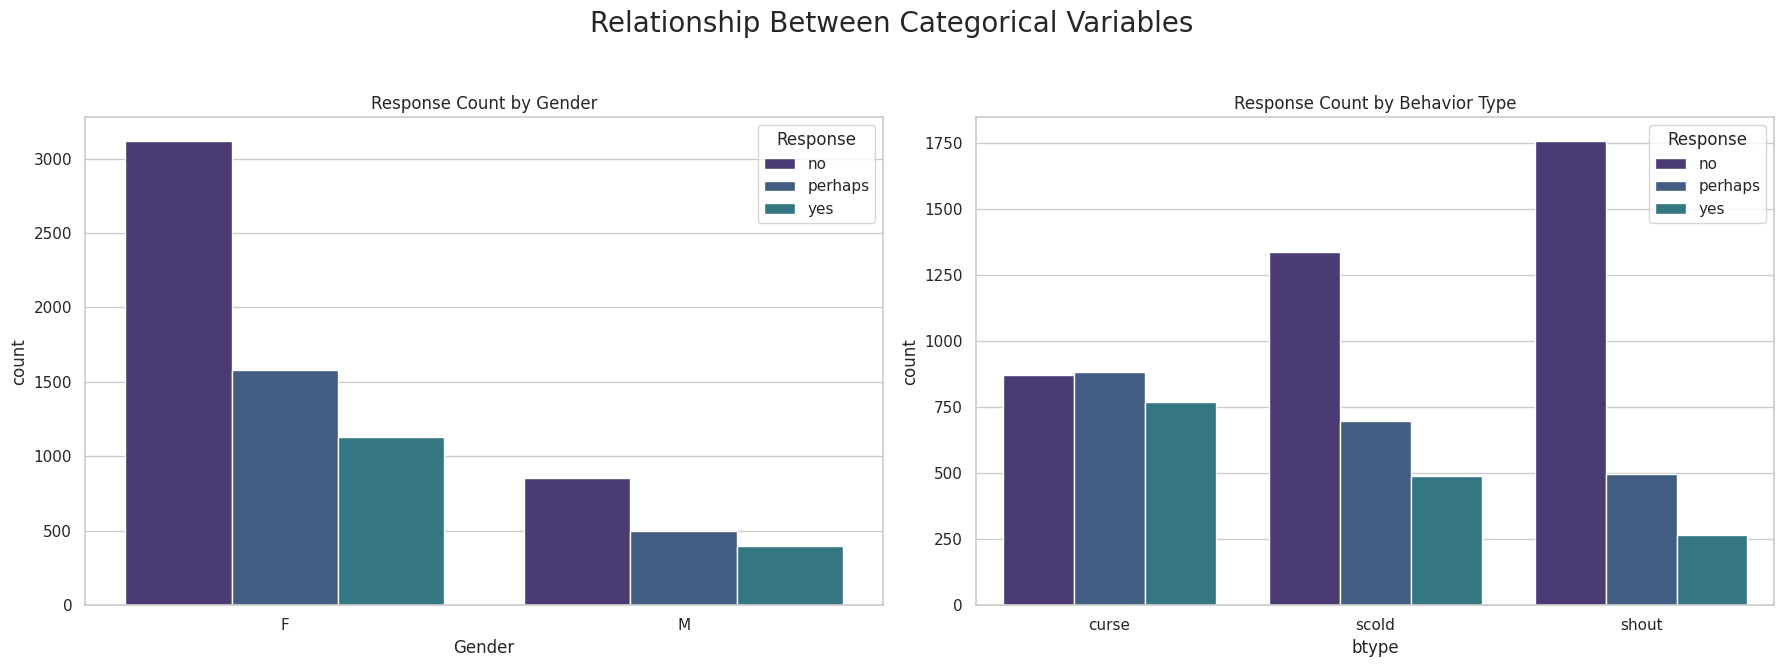

In [ ]:
# Let's analyze Response ('resp') by Gender and Behavior Type ('btype')

fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Relationship Between Categorical Variables', fontsize=20)

# Response vs. Gender
sns.countplot(x='Gender', hue='resp', data=df, ax=axes[0], hue_order=['no', 'perhaps', 'yes'])
axes[0].set_title('Response Count by Gender')
axes[0].legend(title='Response')

# Response vs. Behavior Type
sns.countplot(x='btype', hue='resp', data=df, ax=axes[1], hue_order=['no', 'perhaps', 'yes'])
axes[1].set_title('Response Count by Behavior Type')
axes[1].legend(title='Response')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Multivariate Analysis: Anger vs. btype, conditioned on Gender

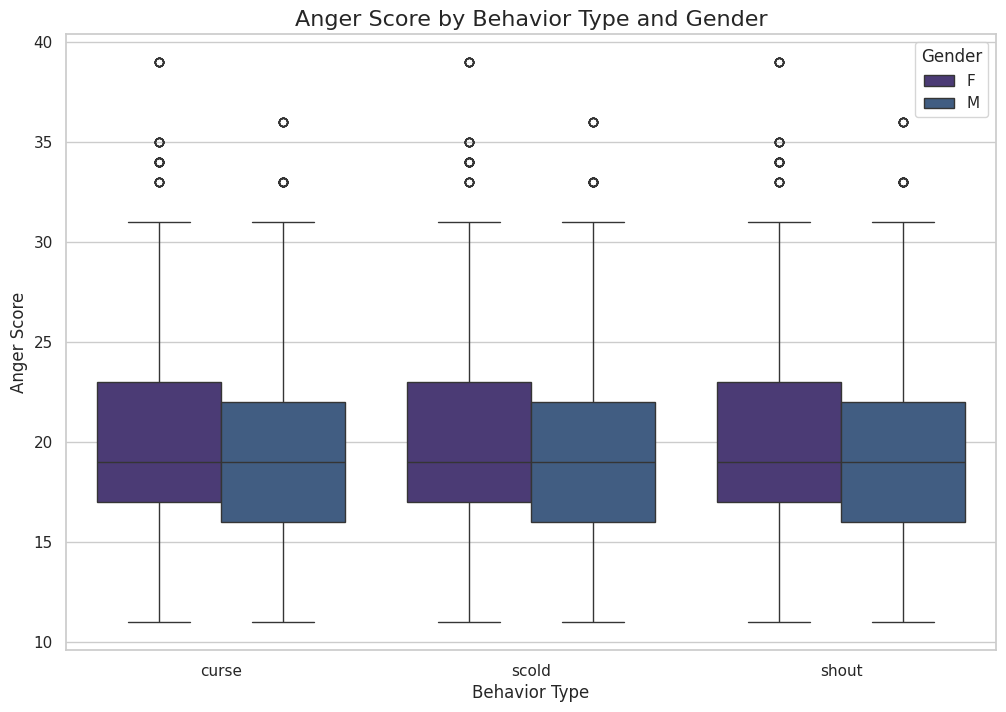

In [ ]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='btype', y='Anger', hue='Gender', data=df)

plt.title('Anger Score by Behavior Type and Gender', fontsize=16)
plt.xlabel('Behavior Type')
plt.ylabel('Anger Score')
plt.legend(title='Gender')
plt.show()

Multivariate Analysis: Anger vs. resp, conditioned on situ

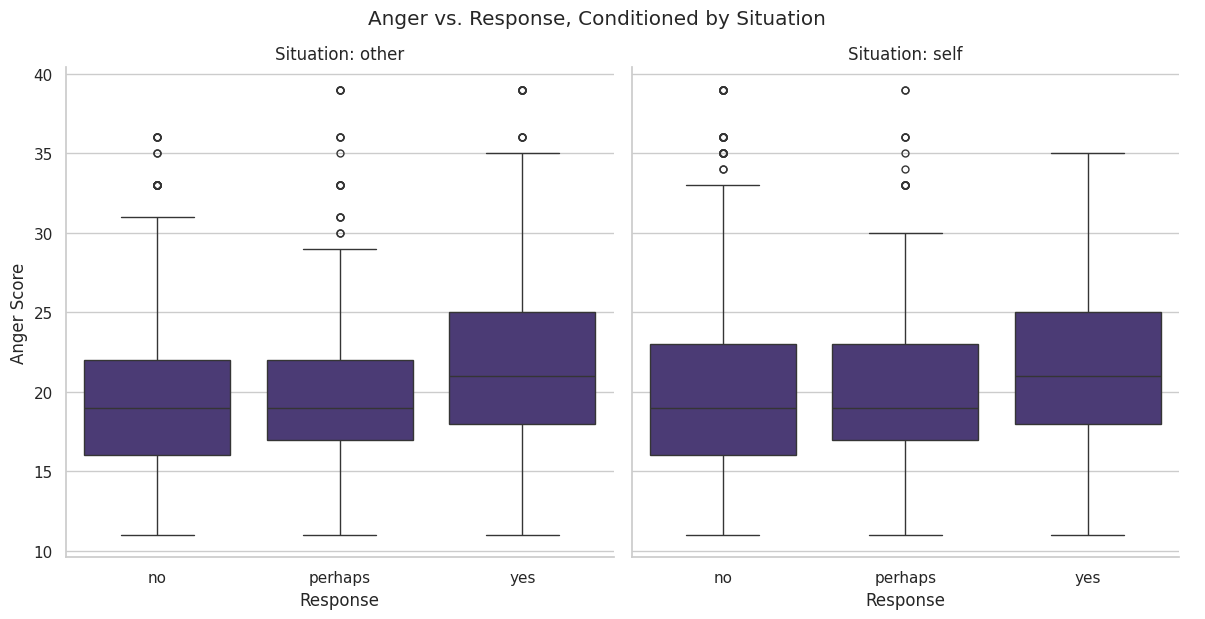

In [ ]:
g = sns.catplot(x='resp', y='Anger', col='situ', data=df,
                kind='box', order=['no', 'perhaps', 'yes'], height=6, aspect=1)

g.fig.suptitle('Anger vs. Response, Conditioned by Situation', y=1.03)
g.set_axis_labels("Response", "Anger Score")
g.set_titles("Situation: {col_name}")
plt.show()